### Practice: Large Language Models and Their Implications
<!-- ![img](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F4470ce74-e595-4750-92a5-5f21f040df6d_577x432.jpeg) -->
![img](https://i.imgur.com/QGYa2J8.jpeg)

In this notebook, you're gonna play with some of the largest language models on the Internet.

_Based on works of: Tim Dettmers, Ruslan Svirschevsky, Artem Chumachenko, Younes Belkada, Felix Marty, Yulian Gilyazev, Gosha Zolotov, Andrey Ishutin,  Elena Volf, Artemiy Vishnyakov, Svetlana Shirokovskih.

### Part 1: prompt engineering (4 points total)

In the assignment, we'll use public APIs that host the 100B+ models for inference. Your task is to prompt-engineer the model into solving a few tasks for you.


__Which API?__ You are free to use any publicly available API for general LM -- as long as it's __not a chat assistant__. So, gpt 3.5 is fine, but chatGPT is not. Here's a few options:

- BLOOM API - [bigscience/bloom](https://huggingface.co/bigscience/bloom) (on the right; recommended)
- OpenAI API (via VPN) - [openai.com/api](https://openai.com/api/)
- AI21 Jurrasic API - [ai21.com](https://www.ai21.com/blog/announcing-ai21-studio-and-jurassic-1)

These APIs may require you to create a (free) account on their platform. Please note that some APIs also have paid subscriptions. __You do not need to pay them__, this assignment was designed to be solved using free-tier subscriptions. If no APIs work for you, you can also solve these tasks with the 6.7B model that you will find later in this notebook - but this will make the tasks somewhat harder.

__Quests:__ you will need to solve 4 problems. For each one, please attach a short __description__ of your solution and a __screenshot__ from the API you use. _[If you use python APIs, show your python code with outputs]_

__Example:__ Tony is talking to Darth Vader ([BLOOM API](https://huggingface.co/bigscience/bloom)). Black text is written manually, blue text is generated.
<hr>

![img](https://i.imgur.com/a1QhKF7.png)
<hr>

__It is fine to roll back a few times,__ e.g. in the example above, the model first generated Vader lines twice in a row, and we rolled that back. However, if you need more than 1-2 rollbacks per session, you should probably try a different prompt.

__Task 1 (1 pt):__ arange a conversation between any two of the following:

- a celebrity or politician of your choice
- any fictional character (except Darth Vader)
- yourself

Compare two setups: a) you prompt with character names only b) you supply additional information (see example).

In [ ]:
# <your code OR writeup with screenshots>
#model = transformers.pipeline("text-generation", model="bigscience/bloom-1b7", device=device)

The `bloom` model can't be loaded on Colab because it takes all the disk space, and the 'bloom-1b7' is giving some nonsense reply, so I decided to use the `Qwen2.5-1.5B-Instruct` model:

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = pipeline("text-generation", model="Qwen/Qwen2.5-1.5B-Instruct", device_map=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

In [ ]:
prompt = 'Make up a simple dialogue between Masha, from Masha and the bear, and Dora the explorer.'
output = model(prompt, max_length=200, truncation=True)
print(output[0]['generated_text'])

Make up a simple dialogue between Masha, from Masha and the bear, and Dora the explorer. Masha: Hello there! I'm Masha, a young girl who loves to explore the world around her.
Dora: Hi there, Masha! I'm Dora, an adventurous girl on my own quest to discover new things in the world.
Masha: That sounds exciting! Have you been to any interesting places recently?
Dora: Yes, I've visited the Amazon rainforest, which was amazing!
Masha: Wow, that must have been incredible! What did you learn while exploring there?
Dora: I learned about the different types of animals that live there and how they interact with each other.
Masha: That's fascinating! Do you think humans can coexist peacefully with wildlife like that?
Dora: Absolutely! We need to protect our planet and its creatures if we want to survive as a species.
Masha: I couldn't agree more.


__Please choose task 2a or 2b (1pt)__ depending on your model (you can do both, but you will be awarded points for one of these two tasks).

__Task 2a: (for BLOOM or other multilingual model)__ zero-shot translation. Take the first verse of [Edgar Allan Poe's "Raven"](https://www.poetryfoundation.org/poems/48860/the-raven) and __translate it into French.__ (You are free to use any other text of at least the same size)

Original text: ```
Once upon a midnight dreary, while I pondered, weak and weary,
Over many a quaint and curious volume of forgotten lore—
    While I nodded, nearly napping, suddenly there came a tapping,
As of some one gently rapping, rapping at my chamber door.
“’Tis some visitor,” I muttered, “tapping at my chamber door—
            Only this and nothing more.”
```

Verify your translation by converting french back into english using a public machine translation service.

__Task 2b: (non-BLOOM):__ toxicity classification for [SetFit/toxic_conversations](https://huggingface.co/datasets/SetFit/toxic_conversations). Make the model solve binary classification (toxic vs not toxic) in the few shot mode. For few-shot examples, use 2-3 toxic and 2-3 non-toxic non-toxic examples. Measure accuracy on at least 25 samples. You may need to try several different prompts before you find the one that works.

In [ ]:
# 2a
prompt = """Translate the following text to French:
Once upon a midnight dreary, while I pondered, weak and weary,
Over many a quaint and curious volume of forgotten lore— While I nodded,
nearly napping, suddenly there came a tapping, As of some one gently rapping,
rapping at my chamber door.
“’Tis some visitor,” I muttered, “tapping at my chamber door— Only this and nothing more.

"""
output = model(prompt, max_length=260)
print(output[0]['generated_text'])

Translate the following text to French:
Once upon a midnight dreary, while I pondered, weak and weary,
Over many a quaint and curious volume of forgotten lore— While I nodded,
nearly napping, suddenly there came a tapping, As of some one gently rapping,
rapping at my chamber door.
“’Tis some visitor,” I muttered, “tapping at my chamber door— Only this and nothing more.

Translation into French:

D'un soir d'été sombre, tandis que je réfléchissais, fatigué et las,

Sur de nombreux volumes curieux et anciens, oubliés par les siècles,

En dormant presque à l'oreille, soudain une tapotement, comme celui d'une personne doucelement tapant,

Tapotant à la porte de mon appartement.

C'est un visiteur qui vient, dit-je, "tapotant à ma porte" - Seule cette chose et rien de plus. 

Note: The translation attempts to capture the poetic nature of the original text by maintaining the rhythm and structure as much as possible in the French version. It also maintains the sense of mystery and suspense co

There are some grammar mistakes, usually, but it is a good translation!

The model is ignoring instructions, so 2b wasn't successful unfortunately.

In [ ]:
#2b <your code OR writeup with screenshots>
#Test the model on these
comments = {
    "The majority of scientist once believed in alchemy, most believed in the Piltdown Man fraud for four decades. When J. Harlan Bretz first suggested that the scablands of Eastern Washington State were created by a massive flood the narrow minded scientific community accused him of being a zealot peddling a flood legend. Bretz was actually not making any theological argument. The notion that scientists aren’t as susceptible to financial self interests, prejudices, biases and mass grouptink as other professions, is utter nonsense. https://en.wikipedia.org/wiki/J_Harlen_Bretz http://www.sciencemag.org/news/2016/08/study-reveals-culprit-behind-piltdown-man-one-science-s-most-famous-hoaxes": "not toxic",
    "Paul Hoobyar notes the hypocrisy of many of those who attacked President Clinton for his infidelity and attempts to deny such action. Certainly President Clinton's actions were immoral and tacky. However, if all immoral and tacky players on the Washington stage were 'sent packing' the city would be a ghost town. Those who attacked him, did so, not out of moral outrage, but out of political expediency........those attacks were an effort to destroy his presidential effectiveness.......and, yes, they worked pretty well. Attacks on Ms Clinton have little to do with concerns over 'national security' and everything to do with attempting to destroy her credibility as a Presidential candidate. We'll see how effective those attacks are as the Presidential campaign progresses. If Ms Clinton and Mr. Trump are the candidates, the 2016 election is guaranteed to be the nastiest campaign in our history.": "not toxic",
    "Dozens of civilians killed in US-led airstrike on Isis stronghold in Syria": "not toxic",
    "Is a restaurant review a 'news' story? It's not on the Opinion page. The headline itself calls the piece 'analysis'. How is that confusing? It is analysis, not news. Those are two completely different things. It's not the DP's fault when their detractors don't even know what words mean. Keep getting that 'news' from Mark Furhman, Sean Hannity, Alex Jones, and Ann Coulter. LOL.": "not toxic",
    "Yes, a good point. So far only a rambling Greek bishop, a couple of 'new' Cardinals and Msgr Pio Pinto obviously hoping for a red hat of his own have criticised the four Cardinals.": "not toxic",
    "The guy's a damn cop, so what do you expect?": "toxic",
    "Wow! The bigotry of Butts' PMO minions defines the hypocrisy of the Liberals!": "toxic",
    "I would suggest that the drunk pilot is the culprit. Blaming outside/inside agencies gets you in the paper but in fact is total hogwash!": "not toxic",
    "It does seem in the last few years that more and more women are involved in the more violent types of criminal conduct. In the 'olden days' violence by women seemed to be mostly in reaction to wife beating type scenarios. Now, no one is surprised by armed robberies, beatings, knifings, and this sort of conduct by women. They are being convicted of sex abuse regarding minors as well. Their punishment is almost always less, but the convictions are increasing.": "not toxic",
    "Haaaa ha haaaa ha oh my - What a classic post!!!!": "not toxic",
    "So...not only do you; 1) call yourself 'Stress Free Investing' 2 (apparently) keep a record of all my past comments...... 3) you keep lists of 'famous quotes' that support all your opinions. . Time for a vacation :):)": "not toxic",
    "Is that what you hand out to the boys in your scout troop? Tell me again why BSA enrollment has significantly declined since 2013?": "not toxic",
    "'Right to Work' is a Trade Union issue vs a Trade issue. It shouldn't even be discussed. The focus needs to be on leveling the playing field with fair wages, safe working conditions, and environmental protections. That is what benefits Canada. Quit mollycoddling the self-absorbed special interest groups and start negotiating for a strong base that everyone (workers and businesses) can build from and prosper.": "not toxic",
    "I forgot to say, 'You make some good points.' Ideally, your 'brave new world' would be a better place. I admit, the picture I have drawn is much more gloomy. I think we already have more 'shadow government' than is good for our nation, starting with the 'military-industrial complex' (Ike added '-congressional') that Eisenhower warned us about.": "not toxic",
    "Ian Tracy remains a very compelling presence. He absolutely killed it in Da Vinci’s Inquest.": "not toxic",
    "To be subject to the injustices of the world is part of the human condition. Nobody knew that better than Jesus, and his followers must accept it as part of the cross they are asked to take up. But the Church should never particulate in that injustice. Never. We should be fiercely devoted to the truth, however painful and whatever the consequences. That's why those in positions of responsibility should recuse themselves from situations where they might be tempted to act out of self-interest or misguided bias. Imperfect as it is, the best place for Cardinal Pell's case is in the courts. All we can do is pray for him, for the victims of child abuse and for the wisdom and integrity of those charged with rendering justice.": "not toxic",
    "This is different this time. They know better than to pull that one. There would be revolution.": "not toxic",
    "You first. You want the guns. People like you always look to others to solve a problem.": "not toxic",
    "What is most important is that he be independent and loyal nott o Trump or any president but loyal to the Constitution. Trump is a disgrace and a disaster. He needs to go back to his phony TV show.": "toxic",
    "Did you even bother to listen to it or were you triggered?": "toxic",
    "Easy to criticize when your the ex PM. As for gender, climate change and aboriginal issues every good negotiator has throw away agenda items they are willing to give up to get the things they want.": "not toxic",
    "Cardinal Timothy Dolan of New York, who grew close to Ryan when he was archbishop of Milwaukee, called him a 'great public servant' with an 'obvious solicitude for the poor.' Tim Dolan is absolutely shameless.": "not toxic",
    "World resort cities really do not need a lot of gas stations. They are not real cities. They are more like a cross between Disneyland and a cruise ship. As long as there are good roads for the short trip to the airport, with its flights to Hong Kong and Beijing and Shanghai and Chongqing, and as long as there are gas stations near the airport to fuel the high end cars jotting to the airport from Kerrisdale and Shaugnessey and Dunbar, that is all that the world resort city needs, that is all its millionaires need who work overseas. No need for hardware stores or books stores or corner stores. And the service workers who dash in and out of the world resort city (teachers, nurses, etc), they can buy their gas and goods thirty miles away, where they live, in the service enclaves of Surrey and Port Coquitlam. They key thing to understand here is that world resort cities are not real cities, in the culturally traditional sense of Canadian cities.": "not toxic",
    "no one can, people have rights to live on streets and some always will": "not toxic",
    "Everybody wants a handout.......pathetic": "toxic",
    "NP> The biggliest - to infinity and the end of time - absolute mostest ridiculous in the history of ridiculous. Ever. Believe me.": "not toxic",
    "I'd blame the RCMP for not investigating this guy more thoroughly in 2015 and building a deportation case but the reality is the Liberals would have just kept him around anyway. Officers probably throw their arms up in frustration and move onto something else where they might be able to get something accomplished.": "not toxic",
}

few_shots_0 = [
    "Donald see above discussion. All Alaskans are stockholders in their own assets. We have a chance to be more democratic than all other states because we can affect the board of directors (leg) and the chair of the board (gov) actions. The value of our stock has been reduced...thus the leg and the gov should receive critiques and repercussions.",
    "To continue the point, Garner was NOT put in a chokehold. He died exacerbating his own physical limitations/ailments, caused by his own actions.",
    "Another form of slavery. Been there, done that. They are doing something with their lives: they're living."
    "Shouldn't this how business be conducted? Why the news?"]

few_shots_1 = [
    "ph lefty lib troll no one cares what bs you think about the conservatives, go back in your cave and stay there",
    "Maybe the legalized weed attracted the weirdos?",
    "This injustice simply CANNOT stand. We will not live in a fair and just society until white people have been punished for the sins of their forbears and reparations have been made to ALL people of colour for the centuries of persecution at the hands of Imperialist Caucasians.",
    "I believe this ALCOHOLIC has had plenty of chances. He has exceeded the cats 9 lives term. I believe he should NEVER be allowed to drive again or own any vehicles EVER. Why do you think he moved here from the state of Washington? Because he is aware of LAME County's catch and release mentality. Let him DIE in prison BEFORE he KILLS someone................"
]

In [ ]:

'''
non_toxic_exps = '\n'.join(few_shots_0)
toxic_exps = '\n'.join(few_shots_1)
count = 0
for comment, toxicity in comments.items():
    prompt_toxicity = f"""
I want you to classify the following comment as 'toxic' or 'non toxic' (binary classification).\n
For every comment, answer '1' if you consider it toxic, '0' if you consider it non toxic, and nothing else.\n
Here is the comment: {comment}\n
Here are some examples of non toxic comments:\n
{non_toxic_exps}\n
And here are some examples of toxic comments:\n
{toxic_exps}\n
    """
    output = model(prompt_toxicity, max_new_tokens=5, return_full_text=False, num_return_sequences=1)
    model_toxicity = output[0]['generated_text']
    #batch = tokenizer([prompt_toxicity], return_tensors='pt', return_token_type_ids=False).to(device)
    #output_tokens = model.generate(**batch, max_new_tokens=5, do_sample=True, temperature=0.8, num_return_sequences=1)
    #model_toxicity = tokenizer.decode(output_tokens[0].cpu())
    print(f'toxicity: {toxicity}, LM classification: {model_toxicity}')
    if toxicity==model_toxicity:
      count +=1
'''

Accuracy for toxicity classification:

In [ ]:
#accuracy = count/len(comments)


__Task 3 (1pt):__ create a prompt and few-shot examples tha make the model __change the gender pronouns__ of the main actor in a given sentence in any direction of your choice. E.g. the doctor took off _his_ mask <-> the doctor took of _her_ mask.


In [ ]:
# <your code OR writeup with screenshots>
#3
sentence = "He removed his coat."
prompt = f"""Change the gender pronouns of the main actor (but not the main actor) in a given sentence to feminine gender.
Here are some examples to follow:
1. The doctor took off his mask <-> the doctor took off her mask.
2. He talked with his brother <-> She talked with her brother.
3. The teacher put on his coat <-> The teacher put on her coat.
4. He is drinking his coffee <-> She is drinking her coffee.
Sentence: {sentence}
"""
output = model(prompt, max_length=120, temperature=0.2)
print(output[0]['generated_text'])

Change the gender pronouns of the main actor (but not the main actor) in a given sentence to feminine gender.
Here are some examples to follow:
1. The doctor took off his mask <-> the doctor took off her mask.
2. He talked with his brother <-> She talked with her brother.
3. The teacher put on his coat <-> The teacher put on her coat.
4. He is drinking his coffee <-> She is drinking her coffee.
Sentence: He removed his coat.
The sentence would be changed to: She removed her coat.


__Task 4 (1pt):__ write a prompt and supply examples such that the model would __convert imperial units to metric units__ (miles -> kilometers; mph -> kph). More specifically, the model should rewrite a given sentence and replace all imperial units with their metric equivalents. After it works with basic distances and speed, try to find complicated examples where it does *not* work.

Please note that 1 mile is not equal to 1 km :)

In [ ]:
#3
sentence_A = "The distance to the hotel is 100 miles."
sentence_B = "He is driving at 90 mph!"
prompt = f"""In the 2 sentences below, convert miles to kilometres and mph to kph, and write them back,
knowing that 1 mile = 1.6 km, and also 1 mph = 1.6 kmph.
Sentence A: {sentence_A}
Sentence B: {sentence_B}

"""
output = model(prompt, max_length=140, temperature=0.2)
print(output[0]['generated_text'])

In the 2 sentences below, convert miles to kilometres and mph to kph, and write them back,
knowing that 1 mile = 1.6 km, and also 1 mph = 1.6 kmph.
Sentence A: The distance to the hotel is 100 miles.
Sentence B: He is driving at 90 mph!

Sentence A: The distance to the hotel is **160 kilometers**.

Sentence B: He is driving at **144 kph**! 

Note: I've converted both distances and speeds using the given conversion factors (1 mile = 1.6 km and 1 mph = 1.6 km


### Part 2: Parameter Efficient Fine-Tuning
In this notebook, you're gonna fine-tune large language models within limited GPU memory.

In [ ]:
%pip install --quiet transformers accelerate sentencepiece optimum peft bitsandbytes

import torch
import torch.nn as nn
import torch.nn.functional as F

import transformers
from tqdm.auto import tqdm, trange
assert torch.cuda.is_available(), "you need cuda for this part"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 707.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
model_name = 'Enoch/llama-7b-hf'

# loading Llama tokenizer ...
tokenizer = transformers.LlamaTokenizer.from_pretrained(model_name, device_map=device)
tokenizer.pad_token_id = tokenizer.eos_token_id

# ... and the model itself
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_name, device_map='auto', low_cpu_mem_usage=True, offload_state_dict=True,
    load_in_4bit=True, torch_dtype=torch.float32,  # weights are 4-bit; layernorms and activations are fp32
)
for param in model.parameters():
    param.requires_grad=False

model.gradient_checkpointing_enable()  # only store a small subset of activations, re-compute the rest.
model.enable_input_require_grads()     # override an implementation quirk in gradient checkpoints that disables backprop unless inputs require grad
# more on gradient checkpointing: https://pytorch.org/docs/stable/checkpoint.html https://arxiv.org/abs/1604.06174

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/218 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message


config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


pytorch_model.bin.index.json:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

pytorch_model-00001-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00002-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00003-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00004-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00005-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00006-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00007-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00008-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00009-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00010-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00011-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00012-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00013-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00014-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00015-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00016-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00017-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00018-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00019-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00020-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00021-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00022-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00023-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00024-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00025-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00026-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00027-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00028-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00029-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00030-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00031-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00032-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00033-of-00033.bin:   0%|          | 0.00/524M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/151 [00:00<?, ?B/s]

In [ ]:
prompt = "The first discovered martian lifeform looks like"
batch = tokenizer([prompt], return_tensors='pt', return_token_type_ids=False).to(device)
print("Input batch (encoded):", batch)

output_tokens = model.generate(**batch, max_new_tokens=64, do_sample=True, temperature=0.8)
# greedy inference:                                        do_sample=False)
# beam search for highest probability:                     num_beams=4)

print("\nOutput:", tokenizer.decode(output_tokens[0].cpu()))

Input batch (encoded): {'input_ids': tensor([[    1,   450,   937, 10943, 14436,   713,  2834,   689,  3430,   763]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

Output: <s>The first discovered martian lifeform looks like a Venus Fly Trap.
Cutting-edge biology research at the University of California-Berkeley has yielded a breakthrough in the study of Martian life, revealing that the first known martian lifeform resembles a Venus flytrap.
Professor Emerit


### Adapter basics: LoRA (1 points)

When training on more serious tasks, you can use low-rank adapters based on the [LoRA paper](https://arxiv.org/pdf/2106.09685.pdf).

The core idea is to add low-rank adapters __in parallel with existing linear layers,__ like this:
<center><img src="https://i.imgur.com/6bQLNiG.png" width=240px></center>

In the original LoRA paper, the adapters were only added to attention projection matrices. However, [subsequent works](https://arxiv.org/abs/2305.14314) show that it is useful to adapt FFNs as well. But before we do any training, we need to implement the basic LoRA layer.

In [ ]:
class LoRALayer(nn.Module):
    """Wraps a linear layer with LoRA-like adapter. Wraps an existing OPT linear layer"""
    def __init__(self, module: nn.Linear, rank: int):
        super().__init__()
        self.module = module  # pre-trained (frozen) linear layer
        self.adapter_A = nn.Parameter(torch.empty(module.in_features, rank, device=module.weight.device))
        nn.init.kaiming_uniform_(self.adapter_A, a=5 ** 0.5)
        self.adapter_B = nn.Parameter(torch.zeros(rank, module.out_features, device=module.weight.device))

    def forward(self, input):
        # Apply self.module and LoRA adapter, return the sum (self.module outputs + adapter outputs)
        return self.module(input) + (input@self.adapter_A)@self.adapter_B

In [ ]:
# test your implementation
test_linear = nn.Linear(128, 128)
test_linear.weight.data[...] = torch.eye(128)
test_adapter = LoRALayer(test_linear, rank=8)

assert torch.allclose(test_adapter(torch.ones(1, 1, 128)), test_linear.bias + 1), "please check your forward pass"

test_adapter.adapter_A.data[...] = torch.linspace(0.1, -0.5, 128 * 8).view(128, 8)
test_adapter.adapter_B.data[...] = torch.linspace(0.5, -0.1, 128 * 8).view(8, 128)
test_linear.bias.data[...] = torch.linspace(1., -1., 128)

dummy_loss = F.mse_loss(test_adapter(torch.ones(1, 128) / 128).squeeze(), torch.linspace(-1, 1, 128))
assert torch.allclose(dummy_loss, torch.tensor(1.3711389), rtol=0, atol=1e-4)
dummy_loss.backward()
assert all(w.grad is not None for w in [test_adapter.adapter_A, test_adapter.adapter_B]), "some adapter weights have no grad"
assert torch.allclose(test_adapter.adapter_A.grad.sum(), torch.tensor(-0.60158), rtol=0, atol=1e-4), "bad grad w.r.t. A"
assert torch.allclose(test_adapter.adapter_B.grad.sum(), torch.tensor(0.9931), rtol=0, atol=1e-4), "bad grad w.r.t. B"
# note: bad grad means that your code is different from LoRA paper OR that your code is not autograd-friendly (e.g. no_grad)
del dummy_loss, test_linear, test_adapter
print("All tests passed!")

All tests passed!


### Apply LoRA to the model

The code below applies LoRA adapters on top of Q/K/V linear layers in Llama attention. You may also choose to modify other layers:
* self_attn.o_proj - attention output projection
* mlp.up_proj, mlp.gate_proj, mlp.down_proj - transformer feedforward layers
* lm_head - output LM head

__Note:__ please scroll down for the homework task

In [ ]:
lora_rank = 8

for name, module in model.model.layers.named_modules():
    if 'LlamaDecoderLayer' in repr(type(module)):
        module.self_attn.q_proj = LoRALayer(module.self_attn.q_proj, rank=lora_rank).to(device)
        module.self_attn.k_proj = LoRALayer(module.self_attn.k_proj, rank=lora_rank).to(device)
        module.self_attn.v_proj = LoRALayer(module.self_attn.v_proj, rank=lora_rank).to(device)

assert sum(isinstance(module, LoRALayer) for module in model.modules()) == 96  # for Llama-7B

In [ ]:
batch = tokenizer("This model wants to share its greatest secret:", return_tensors='pt', return_token_type_ids=False)
# test a single training step, make sure we get meaningful gradients
with torch.cuda.amp.autocast(dtype=torch.float32):
    out = model.forward(**batch)
    (out.logits.norm() / 100).backward()

for i, module in enumerate(model.modules()):
    if isinstance(module, LoRALayer):
        assert module.adapter_B.grad is not None
        assert module.adapter_B.grad.norm().item() > 0

model.zero_grad(set_to_none=True)
print("Grad check successful, well done!")

<ipython-input-7-4e8162d18fe7>:3: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(dtype=torch.float32):


Grad check successful, well done!


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:825: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


### Toy task: the story of a fox (1 point)

![img](https://i.imgur.com/Ux3qQAu.png) (source: theodd1souts.fandom.com)

In [ ]:
prompt = 'A quick brown fox'
batch = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)

for i in range(10):
    next_token = model(**batch).logits[0, -1].argmax(-1).reshape(1, 1)
    batch['input_ids'] = torch.cat([batch['input_ids'], next_token], dim=-1)
    batch['attention_mask'] = torch.cat([batch['attention_mask'], torch.ones_like(next_token)], dim=-1)

print("\nOutput:", tokenizer.decode(batch['input_ids'][0].cpu().numpy().tolist()))


Output: <s>A quick brown fox jumps over the lazy dog.
A quick


What a blatant lie! This particular fox assures you that it didn't in fact jump over the lazy dog. No, sir! The fox was just minding its own business. __Your task is to train the model to say truth: no dog was jumped over today.__

In [ ]:
the_truth = "A quick brown fox did not jump over the lazy dog. Besides, that dog deserved it anyway!"
batch = tokenizer(the_truth, return_tensors='pt', return_token_type_ids=False).to(device)
outputs = model(**batch)

next_word_logits = outputs.logits[:, :-1]
true_next_tokens = batch['input_ids'][:, 1:]
loss = F.cross_entropy(next_word_logits.flatten(0, 1), true_next_tokens.flatten(0, 1))

print("Loss:", loss)

Loss: tensor(3.0729, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
the_truth = "A quick brown fox did not jump over the lazy dog. Besides, that dog deserved it anyway!"
batch = tokenizer(the_truth, return_tensors='pt', return_token_type_ids=False).to(device)

opt = torch.optim.Adam(model.parameters(), lr=2e-4)  # only LoRA parameters are trainable


#<Your task: iteratively train the model to reduce loss using prompt optimizer (opt)>
for i in range(20):
    opt.zero_grad()

    #Calculate loss
    outputs = model(**batch)
    next_word_logits = outputs.logits[:, :-1]
    true_next_tokens = batch['input_ids'][:, 1:]
    loss = F.cross_entropy(next_word_logits.flatten(0, 1), true_next_tokens.flatten(0, 1))

    print(f'epoch {i+1}, loss = {loss.item()}')
    #Update step
    loss.backward()
    opt.step()


assert loss.item() <= 0.1
print("Good job!")

epoch 1, loss = 3.072885036468506
epoch 2, loss = 2.0028440952301025
epoch 3, loss = 1.4992821216583252
epoch 4, loss = 1.1564011573791504
epoch 5, loss = 0.8614671230316162
epoch 6, loss = 0.5954916477203369
epoch 7, loss = 0.3555116653442383
epoch 8, loss = 0.23659738898277283
epoch 9, loss = 0.19748301804065704
epoch 10, loss = 0.17789295315742493
epoch 11, loss = 0.15597234666347504
epoch 12, loss = 0.12596525251865387
epoch 13, loss = 0.076634980738163
epoch 14, loss = 0.039212290197610855
epoch 15, loss = 0.1840202659368515
epoch 16, loss = 0.0012695814948529005
epoch 17, loss = 0.0009878533892333508
epoch 18, loss = 0.0013867230154573917
epoch 19, loss = 0.012538417242467403
epoch 20, loss = 0.0033650919795036316
Good job!


In [ ]:
loss.item()

0.0033650919795036316

In [ ]:
prompt = 'A quick brown fox'
batch = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)

for i in range(15):
    next_token = model(**batch).logits[0, -1].argmax(-1).reshape(1, 1)
    batch['input_ids'] = torch.cat([batch['input_ids'], next_token], dim=-1)
    batch['attention_mask'] = torch.cat([batch['attention_mask'], torch.ones_like(next_token)], dim=-1)

print("\nOutput:", tokenizer.decode(batch['input_ids'][0].cpu().numpy().tolist()))
# note: if you did everything right, your model will generate "fox did not jump over the lazy dog"...


Output: <s>A quick brown fox did not jump over the lazy dog. Besides, that dog deserved it


### Note: using HuggingFace PEFT

[`peft`](https://huggingface.co/docs/peft/index) is a transformer's sister library that allows you to apply various __p__arameter __e__fficient __f__ine-__t__uning methods to pre-trained transformers. The library imlements both LoRA, prompt tuning, prefix tuning, as well as several other adapter-based techniques under a common interface.

You can find the basic tutorial for using PEFT here: https://huggingface.co/docs/peft/task_guides/clm-prompt-tuning . You may (or may not) choose to use this library in the next assignment.


### (example) How to train your model with HF Trainer

The example below shows how to train the LoRA adapters on a dummy dataset. You will need to run a _similar_ training task later.

__Note:__ please scroll down for the homework task

In [ ]:
model_name = 'Enoch/llama-7b-hf'

# reload model to forget the previous training run
tokenizer = transformers.LlamaTokenizer.from_pretrained(model_name, device_map=device)
tokenizer.pad_token_id = tokenizer.eos_token_id

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_name, device_map='auto', low_cpu_mem_usage=True, offload_state_dict=True,
    load_in_4bit=True, torch_dtype=torch.float32,  # weights are 4-bit; layernorms and activations are fp32
)
for param in model.parameters():
    param.requires_grad=False
model.gradient_checkpointing_enable()
model.enable_input_require_grads()

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
# checking if the model can learn. Change max_steps for proper training
import datasets
data = datasets.load_dataset("Abirate/english_quotes", split="train[:32]") # 32 lines
data = data.map(lambda samples: tokenizer(samples['quote']), batched=True)
model._hf_peft_config_loaded = True  # silence a warning from HF trainer

trainer = transformers.Trainer(
    model=model, train_dataset=data,
    args=transformers.TrainingArguments(
        per_device_train_batch_size=2, gradient_accumulation_steps=1,
        # note: if you want larger batch size, increase gradient_accumulation_steps
        warmup_steps=250, max_steps=100, learning_rate=2e-6, fp16=True,
        logging_steps=1, output_dir='outputs', report_to=None
        ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False)
)
# if you see cache warnings, set `model.config.use_cache = False` to silence them. Please re-enable for inference!

trainer.train()

# NOTE: this is just an example! you do not have to wait for this progressbar to finish :)

In [ ]:
#The trainer above didnt work, for some reason... Some optimizer error!
#So, a manual loop for the upcoming part.

### Final task: *actually* train the model (4 points)

Your task is to fine-tune the model to _generate python code_. Please use the above examples for inspiration. More specifically,

* __dataset:__ use [codeparrot-clean](https://huggingface.co/datasets/codeparrot/codeparrot-clean) or any other data containing python code. Since you do not need much data for this excercise, it is enough to use just shorter validation subset of `codeparrots`
* __preprocessing:__ select python code based on file extentions (.py)  (may skip in case of codeparrot - it is 100% python)
* __short lines:__ please take the first 512 characters of each line
* __adapter type:__ please use LoRA as defined above __plus at least one of:__
   - extra adapter on lm_head
   - extra adapter on MLP components (mlp.*)
   - trainable input embeddings (requires tweaking memory usage)

* __training:__ you do not have to train to convergence. If all goes well, your model should `.generate` code after 500 steps. Please use batch size of at least 4 (4 x 1 x 512 tokens) using `gradient_accumulation_steps=4`. **Please make sure you reload model and reset adapters before training**. Your previous model is too concerned about a quick brown fox jumping over the lazy dog.


__Alternative assignment:__ Instead of doing python code, feel free to substitute the task with any other dataset, e.g. your favorite artist or podcast, as long as it's ethical. If you choose your own task, please show examples of what your model learned - or did not learn, akin to the code examples below.

In [ ]:
model_name = 'Enoch/llama-7b-hf'

# reload model to forget the previous training run
tokenizer = transformers.LlamaTokenizer.from_pretrained(model_name, device_map=device, skip_special_tokens=True)
tokenizer.pad_token_id = tokenizer.eos_token_id

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_name, device_map='auto', low_cpu_mem_usage=True, offload_state_dict=True,
    load_in_4bit=True, torch_dtype=torch.float32, use_cache=False
)
for param in model.parameters():
    param.requires_grad=False
model.gradient_checkpointing_enable()
model.enable_input_require_grads()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/218 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message


config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


pytorch_model.bin.index.json:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

pytorch_model-00001-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00002-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00003-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00004-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00005-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00006-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00007-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00008-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00009-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00010-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00011-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00012-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00013-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00014-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00015-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00016-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00017-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00018-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00019-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00020-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00021-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00022-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00023-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00024-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00025-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00026-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00027-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00028-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00029-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00030-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00031-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00032-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00033-of-00033.bin:   0%|          | 0.00/524M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/151 [00:00<?, ?B/s]

In [ ]:
def model_output(model_, prompt):
    batch = tokenizer([prompt], return_tensors='pt', return_token_type_ids=False).to(device)
    output_tokens = model_.generate(**batch, max_new_tokens=200, do_sample=True, temperature=0.8)
    return tokenizer.decode(output_tokens[0].cpu()).replace('<s>','')

In [ ]:
prompts =  ['', 'import', 'from', 'while', 'try', 'if', 'for', 'torch']  # feel free to add a few more that are not 100% assiciated with Python

# generate baseline samples with the selected prompts before finetuning
# please feel free to use transformers.Trainer (as above) or your custom training code
# after the training concludes, please show examples of text generated by your model. It is expected to look like Python code fragments
# print the generation examples nicely (suggestion: use pandas or HTML) for easier comparison
# note: your LoRA-enhanced model can run generation the same way as the non-trained model (above)
batch_size = 4
gradient_accumulation_steps = 4
learning_rate = 1e-4
#500 too long. After 150 steps or so, the loss doesent change much anymore.
max_steps = 200
seq_length = 512
lora_rank = 8  # Rank for the LoRA adapter

Save the model output before training:

In [ ]:
non_trained_output = {}
for prompt in prompts:
    non_trained_output[prompt] = model_output(model, prompt)

In [ ]:
from torch.utils.data import DataLoader
import datasets

# Dataset
parrot_val = datasets.load_dataset("codeparrot/codeparrot-clean-valid", split="train[:]")
def preprocess(examples):
    examples["text"] = [line[:seq_length] for line in examples["content"]]
    return tokenizer(examples["text"],
                     truncation=True,
                     padding="max_length",
                     max_length=seq_length,
                     return_tensors='pt',
                     return_token_type_ids=False).to(device)

parrot_val = parrot_val.map(preprocess, batched=True)
parrot_val.set_format(type="torch", columns=["input_ids", "attention_mask"])
dataloader = DataLoader(parrot_val, batch_size=batch_size, shuffle=True)

README.md:   0%|          | 0.00/401 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


file-000000000054.json.gz:   0%|          | 0.00/142M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/61373 [00:00<?, ? examples/s]

Map:   0%|          | 0/61373 [00:00<?, ? examples/s]

In [ ]:
for name, module in model.model.layers.named_modules():
    if 'LlamaDecoderLayer' in repr(type(module)):
        module.self_attn.q_proj = LoRALayer(module.self_attn.q_proj, rank=lora_rank).to(device)
        module.self_attn.k_proj = LoRALayer(module.self_attn.k_proj, rank=lora_rank).to(device)
        module.self_attn.v_proj = LoRALayer(module.self_attn.v_proj, rank=lora_rank).to(device)
        module.mlp.gate_proj = LoRALayer(module.mlp.gate_proj, rank=lora_rank).to(device)
        module.mlp.down_proj = LoRALayer(module.mlp.down_proj, rank=lora_rank).to(device)
        module.mlp.up_proj = LoRALayer(module.mlp.up_proj, rank=lora_rank).to(device)

model.lm_head = LoRALayer(model.lm_head, rank=lora_rank).to(device)

In [ ]:
params = [p for p in model.parameters() if p.requires_grad]

In [ ]:
from torch.amp import autocast, GradScaler
from tqdm import tqdm

scaler = GradScaler()
# Optimizer
optimizer = torch.optim.AdamW(params, lr=learning_rate)
progress_bar = tqdm(total=max_steps, desc="Training Progress", dynamic_ncols=True, delay=1)

# Training loop
model.train()
steps = 0
loss_values = []
for epoch in range(10):
    #batch_iterator = tqdm(dataloader, desc=f"Training Epoch {epoch + 1}", leave=False)
    for batch in dataloader:

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        with autocast(dtype=torch.float16, device_type=device.type):
            outputs = model(input_ids, attention_mask=attention_mask, labels=input_ids)
            loss = outputs.loss/gradient_accumulation_steps
        #loss.backward()
        # Scale the loss and call backward()
        scaler.scale(loss).backward()

        if (steps + 1) % gradient_accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            #print(f"Step {steps+1}/{max_steps}, Loss: {loss.item()}")


        steps += 1
        progress_bar.set_postfix({"Loss": loss.item()})
        progress_bar.update(1)
        loss_values.append(loss.item())

        if steps >= max_steps:
            break
    if steps >= max_steps:
        break

print("Training complete!")
progress_bar.close()

Training Progress: 100%|██████████| 200/200 [1:15:57<00:00, 22.79s/it, Loss=0.132]

Training complete!


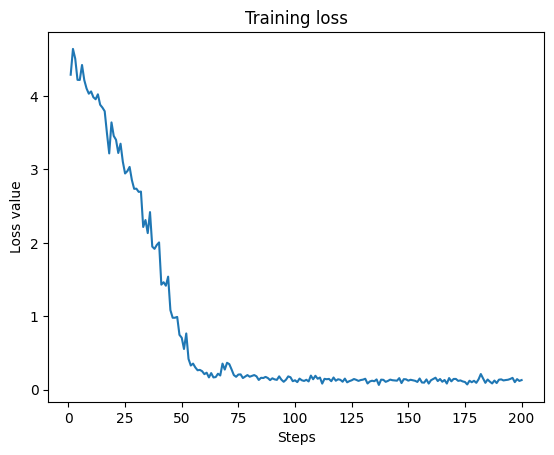

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,max_steps+1), loss_values)
plt.title('Training loss')
plt.xlabel('Steps')
plt.ylabel('Loss value')
plt.show()

In [ ]:
save_model = False
if save_model:
    torch.save(model.state_dict(), f'Llama_LM_trained_py.pt')

In [ ]:
# This template helps to compare generated code samples in pretty table form
# feel free to present your work in other forms
model.eval()

from IPython.display import HTML, display
table_template = """<table style="border:1px solid black" >
  <tr>
    <th style="text-align: center; border:1px solid black">PROMPT</th>
    <th style="text-align: center; border:1px solid black">BEFORE</th>
    <th style="text-align: center; border:1px solid black">AFTER</th>
  </tr>
{}
</table>"""

row_template = '''  <tr>
    <td style="width:20%; border:1px solid black"><pre align="left">`{}`</pre></td>
    <td style="width:40%; border:1px solid black"><pre align="left">{}</pre></td>
    <td style="width:40%; border:1px solid black"><pre align="left">{}</pre></td>
  </tr>'''

rows = []

for prompt in prompts:
    # replace placeholders in the format() arguments
    rows.append(row_template.format(prompt, non_trained_output[prompt], model_output(model, prompt)))

display(HTML(table_template.format('\n'.join(rows))))

PROMPT,BEFORE,AFTER
``,"▲▼▲▲▲▲▲▲▲▼▲▲▲▲▲▲▲▲▲▲▲▲▼▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▼▲▲▲▲▲▲▲▲▲▲▲▲▼▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▼▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▼▼ I hope you are enjoying the lovely weather we are having at the moment! Now that summer is here and you’re thinking of how to spend your time, why not come to our local beach to enjoy some sand and sea! Southend is a lovely beach we have on the Island and is a great day out for the kids! As with most local beaches, dogs aren’t allowed on the beach, however, there is a dog beach in Ramsey. If you",
`import`,"import copy import inspect from keystone.openstack.common import netaddr from keystone.openstack.common import wsgi class RoutingMiddleware(wsgi.MiddlewareMixin): """"""Logs requests to the openstackdash service on the local host."""""" def __init__(self, app): """"""Create our RoutingMiddleware. :param app: an instance of ``wsgi.SimpleApplication`` """""" self.app = app self.registered_hosts = set() self.registered_ports = set() def process_request(self, request): """"""Logs our request to our local host"""""" request.environ['OpenStackdash.route'] = True def process_response(self, request, response): """"""Logs our response to our local","import sys from pytest import fixture, request, raises, patch, override_func from pytest_mock import mock, call_args_any"
`from`,"from __future__ import unicode_literals from django.core.urlresolvers import reverse from django.test import TestCase from . import views class TestView(TestCase): def setUp(self): pass def test_url(self): self.assertEqual(reverse('tests:view1'), 'tests.urls.view1') def test_reverse(self): self.assertEqual(reverse('tests:view1'), 'tests.tests.views.view1') def test_render(self): response = self.client.get(reverse('tests:view2')) self.assertEqual( response.status_code, 200) self.assertEqual(response.content, '{""x"": 1, ""y"": 2}')",from .base import BaseTestCase from .test_functions import assert_results from .test_functions import assert_results_match_str
`while`,"while(true) { $(this).val(function(i) { var result = $(this).data(""result""); result = result.replace(""\\"", ""/""); result = result.replace("" "", ""_""); return result; }); } \end{code} The function is bound to the jQuery object. \begin{code} var $form = $(theForm); \end{code} and then it is applied to the form elements: \begin{code} $form.find(""form"").val(function(i){}); \end{code} Comment: Thanks, but now I have a similar problem: I don't know the name of the form element. The function is still called by ""val"" but I would like to give the function a name to use it by... Comment: @Ronald: I","while true: cmd2 = subprocess.Popen(args,stdout=subprocess.PIPE) for line in cmd2.stdout: if line.split()[0] == ""ERROR"": print(line.split()[1]) raise RuntimeError(line.split()[1]) cmd1 = subprocess.Popen(args,stderr=subprocess.PIPE) for line in cmd1.stderr: if line.find(""ERROR"") != 0: print(line.split()[1]) print(""ERROR!"") raise RuntimeError(line.split()[1]) if cmd1.returncode == 0: print(""Error"") return 1"
`try`,try { var webDriver = require( 'selenium-webdriver' ).getWebDriver(); var test = require( 'selenium-test' ); var expect = require( 'should' ); var webDriver = require( 'selenium-webdriver' ).getWebDriver(); var test = require( 'selenium-test' ); var expect = require( 'should' ); var webDriver = require( 'selenium-webdriver' ).getWebDriver(); var test = require( 'selenium-test' ); var expect = require( 'should' ); var webDriver = require( 'selenium-webdriver' ).getWebDriver(); var test = require( 'selenium-test' ); var expect = require( 'should' ); var webDriver = require( 'selenium-webdriver' ).getWebDriver(); var test = require( 'selenium-test,"try: from setuptools import setup, find_packages except ImportError: from distutils.core import setup"
`if`,"if you are a new visitor to the U.S., you should have received a Form I-94W, Arrival/Departure Record, which is your ""green card."" The Form I-94W should contain an entry for your admission date. If your Form I-94 has b

If you reach this: congratulations! you've completed everything in this practice session.

If you want to dig deeper, try to implement prompt-tuning (for bonus points!).
You can read more about prompt tuning variants in paper [1](https://arxiv.org/abs/2104.08691) or paper [2](https://arxiv.org/abs/2101.00190). Both versions can be implemented by passing trainable prompts as `model.forward(..., past_key_values=your_prompts)`.



### Read more

* How post-training quantization works: https://arxiv.org/abs/2208.07339
* An overview of running large models: https://huggingface.co/docs/accelerate/package_reference/big_modeling
* A general library for different adapter types: https://adapterhub.ml/


### [extra info] Running other models.

This notebook's code can run with other models of similar size, such as [Falcon-7B](https://huggingface.co/tiiuae/falcon-7b), [OPT-6.7B](https://huggingface.co/facebook/opt-6.7b) or [BLOOM-7.1B](https://huggingface.co/bigscience/bloom-7b1). However, they will require minor code tweaks:
1. change the model name in `AutoModelForCausalLM.from_pretrained()` __and__ `AutoTokenizer`
2. In the prompt tuning code, change `model.model.embed_tokens` to refer to the target model's word embeddings. Simply `print(model)` to navigate to them.
3. Change code to add Lora layers - specifically where you what the transformer block components, since those components now have different names.